In [180]:
import pandas as pd
import seaborn as sbn

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt 
%matplotlib inline

In [243]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
train_df.head()




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



### 1. Make a chart of age groups.

0-20 Age Group 1

21-40 Age Group 2

41-60 Age Group 3

61-80 Age Group 4

In [83]:
print(train_df.Age.describe())
print()
print("From the describe function we can figure out that there are missing values in Age. The minimum age is 0.42 (4 months) and maximum age is 80 years")


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%             NaN
50%             NaN
75%             NaN
max       80.000000
Name: Age, dtype: float64

From the describe function we can figure out that there are missing values in Age. The minimum age is 0.42 (4 months) and maximum age is 80 years


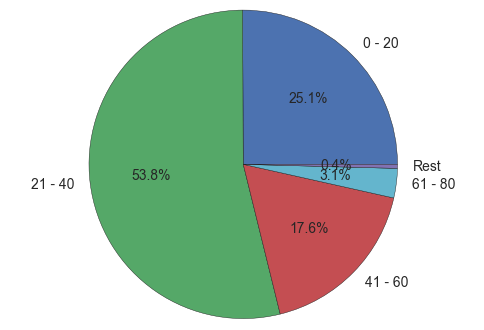

In [131]:
def agePercent(share):
    total_age_count = train_df.Age.count()
    return (share/total_age_count) * 100

        

age_one   = train_df[train_df['Age']<=20].count().Age

age_two   = train_df[train_df[train_df['Age']<=40]>=21].count().Age

age_three = train_df[train_df[train_df['Age']<=60]>=41].count().Age

age_four  = train_df[train_df[train_df['Age']<=80]>=61].count().Age

age_rest = train_df.Age.count() - (age_one + age_two + age_three + age_four)




labels = ['0 - 20','21 - 40', '41 - 60', '61 - 80', 'Rest']


shares = [agePercent(age_one),agePercent(age_two),agePercent(age_three),agePercent(age_four),agePercent(age_rest) ]


fig1, ax1 = plt.subplots()
ax1.pie(shares, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


### 2. Count the number of males and females


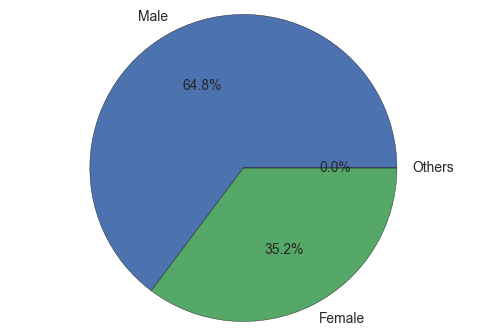

In [162]:
def sexPercentage(share):
    total_sex_count = train_df.Sex.count()
    return (share/total_sex_count) * 100

total_population = train_df.Sex.count()

total_male = train_df[train_df['Sex'] == 'male'].Sex.count()
total_female = train_df[train_df['Sex'] == 'female'].Sex.count()

total_others = total_population - (total_male + total_female)

figureSexes, axisSexes = plt.subplots()

labels = ['Male','Female','Others']
shares = [sexPercentage(total_male),sexPercentage(total_female),sexPercentage(total_others)]
axisSexes.pie(shares, labels=labels, autopct='%1.1f%%', shadow=False, startangle=0)
axisSexes.axis('equal')
plt.show()

### 3. Make a histogram of passenger class

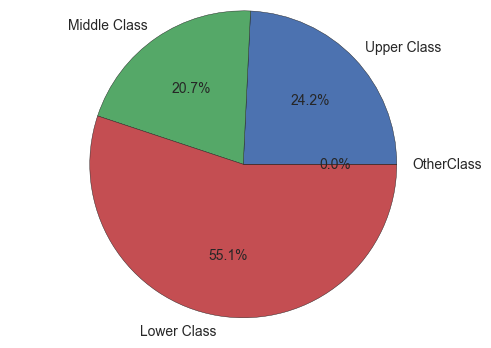

In [184]:
def classPercentage(share):
    total_passengers = train_df.Pclass.count()
    return (share/total_passengers) * 100

passengerClassLabels = ['Upper Class','Middle Class','Lower Class','OtherClass']
passengerClass = {'1': passengerClassLabels[0],'2':passengerClassLabels[1],'3': passengerClassLabels[2]}



upperClassPassengers  = train_df[train_df['Pclass'] == 1].Pclass.count()
middleClassPassengers = train_df[train_df['Pclass'] == 2].Pclass.count()
lowerClassPassengers  = train_df[train_df['Pclass'] == 3].Pclass.count()
otherClassPassengers  = total_passengers - (upperClassPassengers + middleClassPassengers + lowerClassPassengers)

figurePClass, axisPClass = plt.subplots()


shares = [classPercentage(upperClassPassengers),classPercentage(middleClassPassengers),classPercentage(lowerClassPassengers),classPercentage(otherClassPassengers)]
axisPClass.pie(shares, labels=passengerClassLabels, autopct='%1.1f%%', shadow=False, startangle=0)
axisPClass.axis('equal')
plt.show()

# People from which class have died the most?

In [235]:
population = train_df.Survived.count()
total_male = train_df[train_df['Sex'] == 'male'].Sex.count()
total_female = train_df[train_df['Sex'] == 'female'].Sex.count()


all_male_members = train_df[train_df['Sex'] == 'male']
males_who_survived = all_male_members[all_male_members.Survived == 1]
print("Out of {} Male members {} has survived".format(total_male, males_who_survived.Sex.count()))

all_female_members = train_df[train_df['Sex'] == 'female']
females_who_survived = all_female_members[all_female_members.Survived == 1]
print("Out of {} Female members {} has survived".format(total_female, females_who_survived.Sex.count()))

print()

print("So probability of male dying would be {}".format( round(males_who_survived.Sex.count()/total_male,2)))
print("So probability of female dying would be {}".format( round(females_who_survived.Sex.count()/total_female, 2)))



Out of 577 Male members 109 has survived
Out of 314 Female members 233 has survived

So probability of male dying would be 0.19
So probability of female dying would be 0.74


### So from the above we conclude that if in a given dataset if the person is a female, then there is a 0.74 probability that shes dead. And in case of a male there is 0.81 percent probability that he is alive

In [248]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [294]:
backup = train_df
train_df['Sex'].astype('category')
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_df.dropna().drop(labels=["PassengerId","Sex","Survived","Name","Ticket","Cabin","Embarked"], axis=1), train_df.dropna().ix[:,1:2], test_size = .2, random_state = 99)
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
accuracy_score(Y_test, knn.predict(X_test))

0.45945945945945948

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
